# 基于书籍评分和阅读量的高分作者特质分析

**摘要：** 如今不少人希望在写作领域取得成就，一位优秀作者的特质是值得每个人学习的。本课题基于“一万本好书的评分数据数据集”，通过数据可视化的手段，从读者的从众心理、书籍评分与阅读量、作者入选书籍数量与作品评分稳定性等方面展开研究，总结优秀作者的共同点。其中，本课题通过对网络上搜集到的29位作者的样本的研究，找到了计量作者所获成就大小的最佳标准；通过各作者书籍的阅读量平均值、评分平均值的分布情况，得出读者倾向于挑选优秀作家的书籍进行阅读，但对书籍的评分较为客观的结论；通过论证多数作者都同时拥有高、低分作品，以及阅读量比书籍评分对作者更重要，解释了与评分有关的标准为何不宜用来衡量作者成就，并得出结论：好的作者要在大量的写作和试错中成长，不断提升自身水平并努力写出对广大群众有吸引力、有意义的作品。最后，本课题探究了作者的成就与其入选书籍数量、作品评分稳定性的关系，作为佐证和结论深化。

**关键词：** 大数据，文学，书籍评分规律，优秀作者特质

## 一、研究背景

   在当下网络文学盛行的时代，很多人都有想要在小说领域大展身手的愿望，但却不是很清楚如何成为一个优秀的作者，并获得一定成就。因此，本课题选择了“一万本好书的评分数据数据集”，对其进行数据分析和研究，希望能够了解到读者挑选书籍，及如何对书籍进行评分的一些规律，以及作者想要获得较大成就所需具备的一些条件。

## 二、研究问题
   通过对“一万本好书的评分数据集”的统计分析得出，读者对书籍进行评分有何规律？作者要想获得较大的成就需要具备哪些条件？

## 三、研究设计

   首先，本课题需要得到计量作者所获成就大小的一个合理标准。为此，本课题从网络上搜集了29位最受认可的作家，换用不同的计量标准，统计在各计量标准下，他们的得分在数据表里的所有作者中的排名之总和，以总和最小的一个标准为最佳标准，并作为之后研究的基础。

接着，本课题进行了一些与研究有关的定义：

1. 将上述计量作者所获成就大小的最佳标准定义为“作者的评分”。
2. 将平均评分≥ 4的书籍称为“高分书籍”，反之称为“低分书籍”。

再者，为研究“读者对书籍评分的方式的一些规律”，本课题进行了以下问题的探索：

读者在挑选书籍和对书籍进行评分两方面，是否受到了对作者的从众心理的影响，即是否受到作者的名气的影响？

为此，本课题设计以下研究内容：

1. 将作者分为极高分（前150名）和其他作者两类；
2. 分别绘制作者各书籍阅读量平均值、评分平均值的分布图，体现出两类作者的区别，观察其偏态情况，以解决“读者是否受到了对作者的从众心理的影响”的问题。为防止某些作者最著名的作品对阅读量造成数据扰动，影响结果，本课题对低分作品，按评分档次绘制阅读量的热力图佐证。

然后，为研究“作者要想获得较大的成就需要具备的条件”，本课题将研究分为两条思路：

（一）从“为何其它作者评分的标准不合理”以及“阅读量和评分哪个对作者更重要”入手，以一条逻辑链研究评分和阅读量的相关内容；

为此，本课题设计以下研究内容：

1. 为了解“各作者书籍评分平均值不宜作为其成就的衡量标准”的原因，统计是否大多数作者都有一些高分作品，也有不少低分作品；
2. 探究作者的成就与其书籍最大评分的关系；
3. 探究作者的成就与其书籍平均阅读量的关系；
4. 对比书籍最大评分和平均阅读量对作者评分的影响程度。

（二）朝各作者选入书籍的数量和发挥的稳定性方向进行研究，即探究作者的成就与其选入书籍数量、水平发挥的稳定性的关系。

本课题设计了以下研究内容：

1. 各段位作者，不同书籍数量的作者人数分布情况；
2. 各段位作者的书籍评分标准差的分布情况。

## 四、研究过程

### （〇）引入模块

In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import seaborn as sns

### （一）数据清洗

In [3]:
def tf(obj):
    if obj:
        return True
    else:
        return False


path = '完整数据.csv'
df = pd.read_csv(path, encoding='gbk')  # 导入数据集

df.authors = df.authors.str.split(', ').str.get(0)  # 同一作品多个作者，全部取第一个作者
df = df[df.authors.map(lambda s: not tf(re.search(r"[^ '\-\.\w]", s)) and s != 'Anonymous')]  # 去除作者无效的数据
df[df[['authors', 'original_title', 'title']].duplicated() == True]  # 检查重复数据，发现没有

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5


清洗后的DataFrame：

In [4]:
df

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
0,1,2767052,2767052,2792775,272,439023483,9.780000e+12,Suzanne Collins,2008.0,The Hunger Games,...,eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317
1,2,3,3,4640799,491,439554934,9.780000e+12,J.K. Rowling,1997.0,Harry Potter and the Philosopher's Stone,...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543
2,3,41865,41865,3212258,226,316015849,9.780000e+12,Stephenie Meyer,2005.0,Twilight,...,en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439
3,4,2657,2657,3275794,487,61120081,9.780000e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267
4,5,4671,4671,245494,1356,743273567,9.780000e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,441019455,9.780000e+12,Ilona Andrews,2010.0,Bayou Moon,...,eng,4.09,17204,18856,1180,105,575,3538,7860,6778
9996,9997,208324,208324,1084709,19,067973371X,9.780000e+12,Robert A. Caro,1990.0,Means of Ascent,...,eng,4.25,12582,12952,395,303,551,1737,3389,6972
9997,9998,77431,77431,2393986,60,039330762X,9.780000e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,eng,4.35,9421,10733,374,11,111,1191,4240,5180
9998,9999,8565083,8565083,13433613,7,61711527,9.780000e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,eng,3.65,11279,11994,1988,275,1002,3765,4577,2375


### （二）数据提取

**1) 寻找计量作者所获成就大小的最佳标准：**
从网络上搜集29位最受认可的作家，换用不同的计量标准，统计在各计量标准下，他们的得分在数据表里的所有作者中的排名之总和，以总和最小的一个标准为最佳标准，作为之后研究的基础。
考虑到近代以前的作家，由于年代原因，可能对当代作家不具有代表性，研究意义较弱，因此本课题选取现当代作家来作为样本。

In [5]:
# 本课题选取了29位作家作为样本：
# 数据来源：
#     现代世界十大文学大师 海明威上榜，第一来自哥伦比亚_排行榜123网
#     世界十大文豪 当代作家排名(2022年最新排名前十榜单)_www.meihu5.com
stars = 'Gabriel García Márquez', 'Stefan Zweig', 'Milan Kundera', 'Ernest Hemingway', 'Jean-Paul Sartre', 'Albert Camus',\
'W. Somerset Maugham', 'J.D. Salinger', 'Kahlil Gibran', 'J.R.R. Tolkien', 'Jane Austen', 'Dan Brown',\
'Agatha Christie', 'Paulo Coelho', 'Ken Follett', 'John Grisham', 'Stephen King', 'Haruki Murakami',\
'James Patterson', 'Nora Roberts', 'Danielle Steel', 'Mario Vargas Llosa', 'Salman Rushdie', 'Margaret Atwood',\
'Kazuo Ishiguro', 'Hilary Mantel', 'Alice Walker', 'Arundhati Roy', 'Khaled Hosseini'


def total_rank(s):
    ss = s.sort_values(ascending=False)
    return sum(pd.Series(ss.keys())[ss.keys().isin(stars)].index) + 29


get_wavg = lambda a: np.average(a.iloc[:, 0], weights=a.iloc[:, 1])
tr1 = total_rank(df[['average_rating', 'ratings_count']].groupby(df.authors).apply(get_wavg))  # 书籍的平均评分对评分次数的加权平均值
tr2 = total_rank(df[['average_rating', 'books_count']].groupby(df.authors).apply(get_wavg))  # 书籍的平均评分对阅读量的加权平均值
tr3 = total_rank(df.average_rating.groupby(df.authors).max())  # 书籍的平均评分的最大值
tr4 = total_rank(df.books_count.groupby(df.authors).mean())  # 书籍的评分次数的平均值
tr5 = total_rank(df.books_count.groupby(df.authors).max())  # 书籍的评分次数的最大值
tr6 = total_rank(df.ratings_count.groupby(df.authors).mean())  # 书籍的阅读量的平均值
tr7 = total_rank(df.ratings_count.groupby(df.authors).max())  # 书籍的阅读量的最大值
tr8 = total_rank(df[['average_rating', 'books_count']].groupby(df.authors).apply(lambda a: (a.iloc[:, 0] * a.iloc[:, 1]).max()))
# 书籍 平均评分 × 阅读量 的最大值
tr9 = total_rank(df[['average_rating', 'ratings_count']].groupby(df.authors).apply(lambda a: (a.iloc[:, 0] * a.iloc[:, 1]).max()))
# 书籍 平均评分 × 评分次数 的最大值
tr1, tr2, tr3, tr4, tr5, tr6, tr7, tr8, tr9

(53585, 57325, 33167, 12199, 8210, 22083, 14765, 7998, 14514)

发现tr8是最小的，即作者书籍的 $ 平均评分 × 阅读量 $ 的最大值是计量一个作者成就大小的最佳标准。若认为书籍的平均评分能够代表读者对该书的普遍评价，则该标准就是作者的代表作品获得所有读者的评分总和，这就是该标准的意义所在。这也体现出一位作者的成就，不在于他写过作品的数量，也不在于他的作品的总体优劣，而在于他最好的少数几部作品的成就。这是符合本课题的生活常识的。

**2)计算所有作者的评分，生成一个新DataFrame，并排名：**

In [6]:
ad = pd.DataFrame({'rating': df[['average_rating', 'books_count']]
                   .groupby(df.authors)  # 按作者分组
                   .apply(lambda a: (a.iloc[:, 0] * a.iloc[:, 1]).max())  # 计算作者的评分
                   .sort_values()})  # 排名
ad['rank'] = np.arange(ad.shape[0])  # 以评分最小到最大的顺序，从0到3823编排
ad

,rating,rank
authors,,
Helen Macdonald,3.74,0
Steven Levy,3.83,1
Shoichi Aoki,3.94,2
Andy Goldsworthy,3.95,3
Gloria Levine,3.95,4
...,...,...
Charles Dickens,9567.60,3819
Mary Wollstonecraft Shelley,9817.50,3820
Robert Louis Stevenson,9828.86,3821


### （三）读者是否受到了对作者的从众心理的影响？

**设计和验证：**

（1）分别绘制作者各书籍阅读量平均值、评分平均值的分布图，体现出两类作者的区别。若读者不受从众心理的影响，即随机挑选书籍并完全客观根据书籍的优劣进行评分，则两个图像都应当接近正态分布。

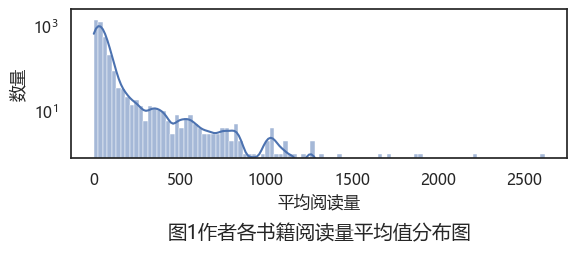

In [32]:
ad['pop_mean'] = df.books_count.groupby(df.authors).mean()  # 计算作者各书籍阅读量平均值
ad['rating_mean'] = df.average_rating.groupby(df.authors).mean()  # 计算作者各书籍评分平均值

sns.set_theme(style='white', font='Microsoft YaHei')  # 设置可视化图像主题

g1 = sns.histplot(data=ad, x='pop_mean', bins=100, kde=True)
g1.set_title('图1作者各书籍阅读量平均值分布图', y=-.6, fontsize=14)
g1.set(xlabel='平均阅读量', ylabel='数量', yscale='log', ylim=(0.8, 2500), box_aspect=0.3)
plt.show()

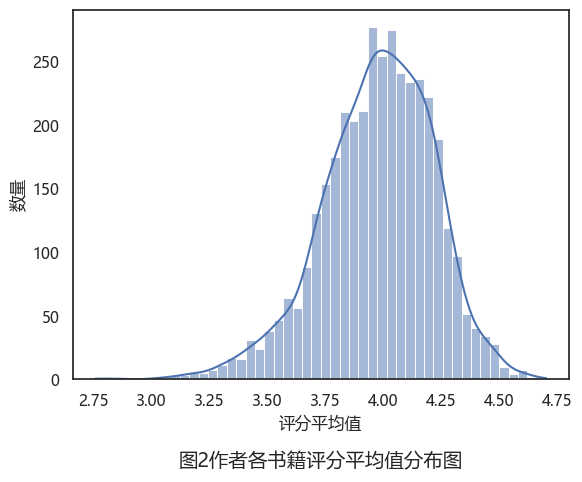

In [38]:
g2 = sns.histplot(data=ad, x='rating_mean', kde=True)
g2.set_title('图2作者各书籍评分平均值分布图', y=-.26, fontsize=14)
g2.set(xlabel='评分平均值', ylabel='数量')
plt.show()

图1作者各书籍阅读量平均值分布图明显呈右偏态，说明读者会有意识地倾向于阅读著名作者的书籍。而图2作者各书籍评分平均值分布图偏态不明显，说明读者对作品的评分并不受作者名气的影响。

（2）为防止某些作者最著名的作品对阅读量造成数据扰动，影响结果，本课题对低分作品，控制书籍评分的变量，进行佐证。即将评分划为20档，作者等频分箱为15组，绘制阅读量的热力图。

C:\Users\Administrator\AppData\Local\Temp\ipykernel_13968\2237353066.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rating_level[df.average_rating < 4] = 'low'  # 分离高低分作品


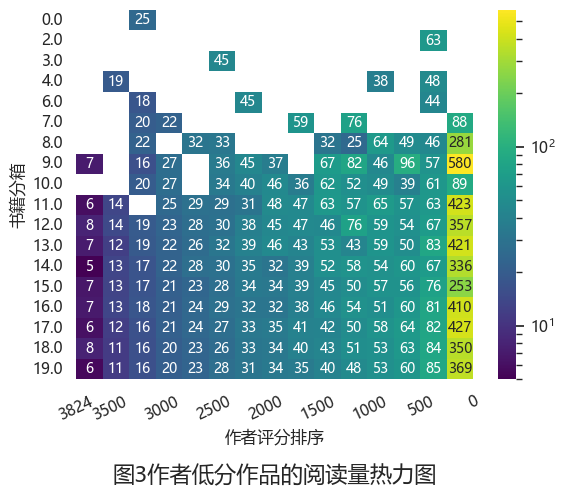

In [39]:
df['rating_level'] = 'high'
df.rating_level[df.average_rating < 4] = 'low'  # 分离高低分作品
ad['level'] = pd.qcut(ad.rating, q=15, labels=False)  # 分箱
df['level'] = df.authors.map(ad.level)
df['rating_hist'] = pd.cut(df.average_rating[df.rating_level == 'low'], bins=20, labels=False)  # 将低分书籍按评分分为20档
crosstab = pd.crosstab(df.rating_hist, df.level, df.books_count, aggfunc='mean')

g3 = sns.heatmap(crosstab, cmap='viridis', annot=True, fmt='.0f', annot_kws={'fontsize': 10}, norm=colors.LogNorm())
g3.set_title('图3作者低分作品的阅读量热力图', y=-.3, fontsize=16)
g3.set(xlabel='作者评分排序', ylabel='书籍分箱', xticks=np.array([0] + list(range(324, 3825, 500))) * 15 / 3824)
g3.set_xticklabels(np.array([3824] + list(range(3500, -1, -500)), dtype=str), rotation=25)
plt.show()

如图3作者低分作品的阅读量热力图所示，越往右，颜色明显越浅，说明阅读量越高。这佐证了读者在挑选书籍时，受到了作者的名气的影响。

**结论：** 读者在挑选书籍时，受到了对作者的从众心理较大程度的影响；而在为书籍评分时则没有。

### （四）书籍评分与阅读量逻辑链
**总问题：** 既然读者对书籍的评分是比较客观的，为何与书籍评分有关的计量作者成就大小的标准不够合理？书籍的评分和阅读量，哪一个对作者更为重要？

#### 1. 为何评分的平均值不适宜作为计量作者成就大小的标准？

**猜想：** 所有的作者，不论优劣，都写过一些好作品，但也写过不少差作品。

**设计：** 统计各作者写过的书籍的评分最小值，和低分作品的占比。若不论作者排名先后，评分最小值都相近，低分作品都有一定占比，则可知猜想成立。

**验证：**

按作者排名，绘制各作者书籍的评分最小值散点图，并作出拟合曲线。

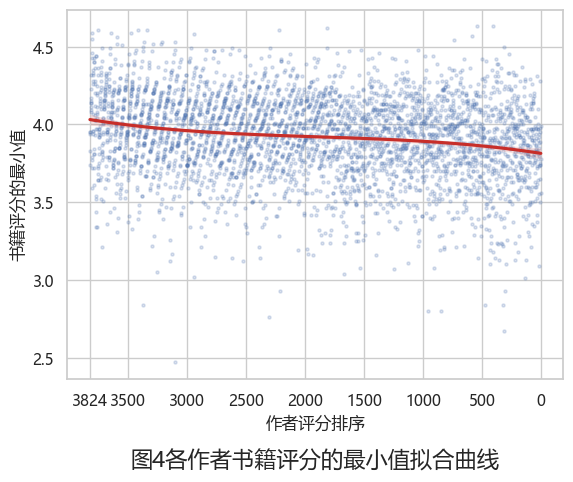

In [43]:
ad['rating_min'] = df.average_rating.groupby(df.authors).min()  # 统计各作者的书籍评分最小值

sns.set_theme(style='whitegrid', font='Microsoft YaHei')  # 设置可视化图像主题

g4 = sns.regplot(data=ad, x='rank', y='rating_min', order=3, scatter_kws={'s': 5, 'alpha': .2}, line_kws={'color': '#c72e29'})
g4.set_title('图4各作者书籍评分的最小值拟合曲线', y=-.26, fontsize=16)
g4.set(xlabel='作者评分排序', ylabel='书籍评分的最小值', xticks=[0] + list(range(324, 3825, 500)),
       xticklabels=np.array([3824] + list(range(3500, -1, -500)), dtype=str))
plt.show()

如图4各作者书籍评分的最小值拟合曲线所示，排名靠前的作者书籍的最低评分并不见得比靠后的作者高。
将作者等频分箱为15组，绘制各组中低分作品占比统计图。

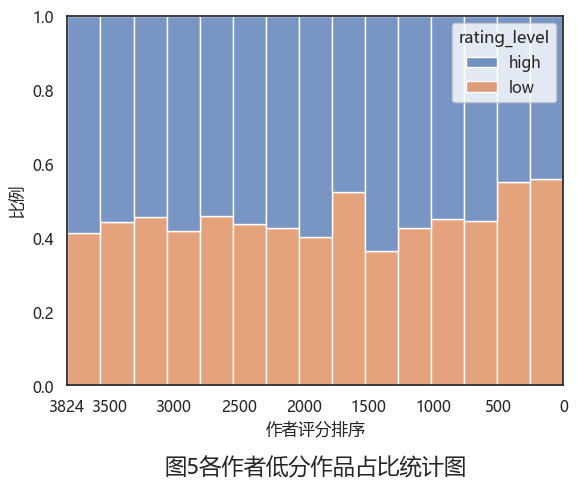

In [44]:
sns.set_theme(style='white', font='Microsoft YaHei')  # 设置可视化图像主题

g5 = sns.histplot(data=df, x='level', multiple='fill', hue='rating_level', bins=range(16))
g5.set_title('图5各作者低分作品占比统计图', y=-.26, fontsize=16)
g5.set(xlabel='作者评分排序', ylabel='比例', xticks=np.array([0] + list(range(324, 3825, 500))) * 15 / 3824,
       xticklabels=np.array([3824] + list(range(3500, -1, -500)), dtype=str))
plt.show()

如图5各作者低分作品占比统计图所示，几乎每组低分作品的占比都接近50%，最高分的作者的低分作品反而较多，超过一半。

**结论：** 说明好的作者也并不一定是所有作品都优秀，他们也存在不少失败的经历。大多数作者只有通过不断的练习和试错，才能创作出少数精品。这也充分说明了书籍评分的平均值不能体现一位作者的水平，不宜作为衡量作者成就大小的标准。

#### 2. 为何评分的最大值不适宜作为计量作者成就大小的标准？

（1）数据现状分析
 

In [12]:
ad['rating_max'] = df.average_rating.groupby(df.authors).max()  # 统计各作者的书籍评分最大值
ad.rating_max.describe()  # 分析书籍评分最大值的数据

count    3824.000000
mean        4.028507
std         0.253977
min         2.760000
25%         3.870000
50%         4.050000
75%         4.200000
max         4.820000
Name: rating_max, dtype: float64

发现25%和75%的四分位数很相近，拉不开差距。

（2）按作者排名，绘制作者书籍评分的最大值的散点图，并作拟合曲线。

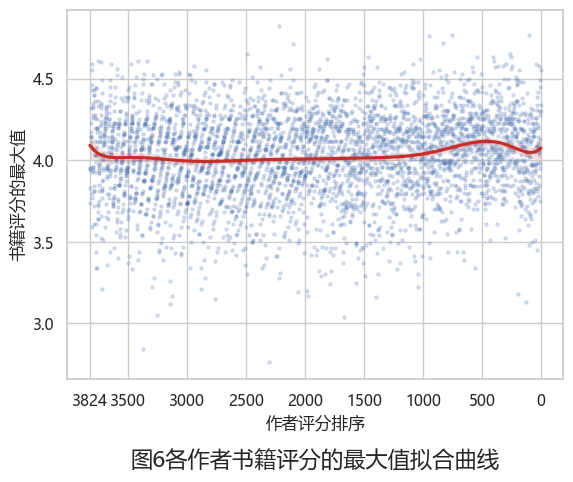

In [48]:
sns.set_theme(style='whitegrid', font='Microsoft YaHei')  # 设置可视化图像主题

g6 = sns.regplot(data=ad, x='rank', y='rating_max', order=10, scatter_kws={'s': 5, 'alpha': .2}, line_kws={'color': '#c72e29'})
g6.set_title('图6各作者书籍评分的最大值拟合曲线', y=-.26, fontsize=16)
g6.set(xlabel='作者评分排序', ylabel='书籍评分的最大值', xticks=[0] + list(range(324, 3825, 500)),
       xticklabels=np.array([3824] + list(range(3500, -1, -500)), dtype=str))
plt.show()

根据图6各作者书籍评分的最大值拟合曲线可见，评分的最大值也没有非常显著的规律，并且还拉不开差距。说明读者们对好作者的作品是褒贬不一的，作者的成就很可能也与书籍评分并没有很大关系。

#### 3. 探究作者的成就与平均阅读量的关系。

按作者的排名，绘制各作者平均阅读量的散点图：
  

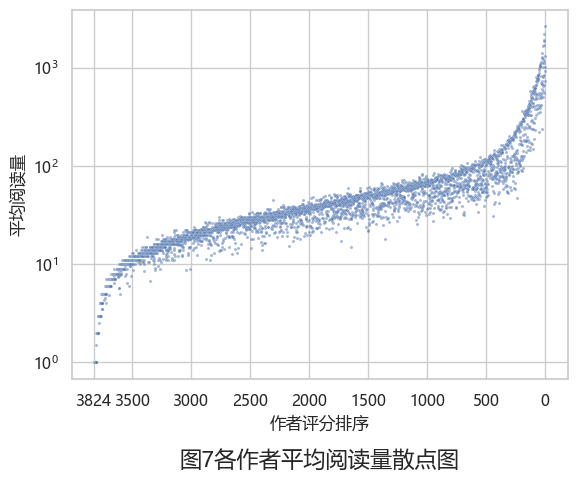

In [49]:
g7 = sns.scatterplot(x=np.arange(ad.shape[0]), y=ad.pop_mean, s=5, alpha=.5)
g7.set_title('图7各作者平均阅读量散点图', y=-.26, fontsize=16)
g7.set(xlabel='作者评分排序', ylabel='平均阅读量', yscale='log', xticks=[0] + list(range(324, 3825, 500)),
       xticklabels=np.array([3824] + list(range(3500, -1, -500)), dtype=str))
plt.show()

如图7各作者平均阅读量散点图所示，越著名的作家阅读量越高，最著名的一些作家阅读量非常高，这是毋庸置疑的。另外，也基本可以看出，相比于书籍的评分，一个作者的成就与阅读量更有关系。

#### 4. 书籍的评分和阅读量，哪一个对作者更为重要？

尝试将作者的评分、平均阅读量、书籍评分最大值三张图像作在一张图中：

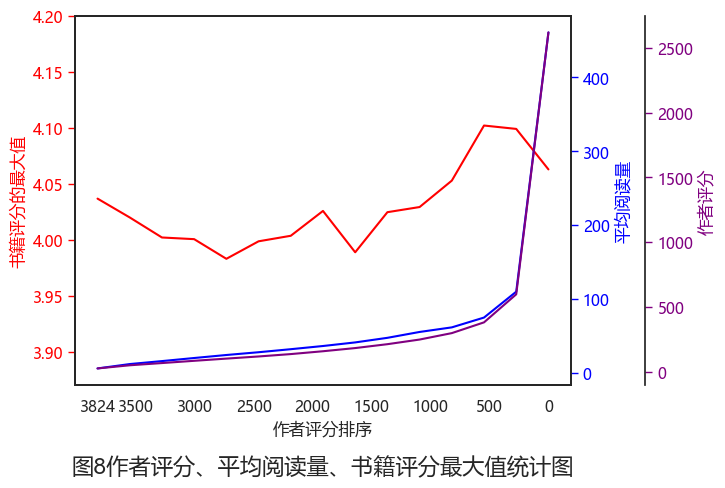

In [50]:
sns.set_theme(style='white', font='Microsoft YaHei')  # 设置可视化图像主题
plt.title('图8作者评分、平均阅读量、书籍评分最大值统计图', y=-.26, fontsize=16)

g8 = plt.subplot()
sns.lineplot(data=ad, x='level', y='rating_max', color='red', err_style=None, ax=g8)
g8.set(xlabel='作者评分排序', ylabel='书籍评分的最大值', ylim=(3.87, 4.20),
        xticks=np.array([0] + list(range(324, 3825, 500))) * 14 / 3824,
        xticklabels=np.array([3824] + list(range(3500, -1, -500)), dtype=str))
g8.yaxis.label.set_color('red')

g81 = g8.twinx()
sns.lineplot(data=ad, x='level', y='pop_mean', color='blue', err_style=None, ax=g81)
g81.set(ylabel='平均阅读量')
g81.yaxis.label.set_color('blue')

g82 = g8.twinx()
sns.lineplot(data=ad, x='level', y='rating', color='purple', err_style=None, ax=g82)
g82.set(ylabel='作者评分')
g82.spines.right.set_position(("axes", 1.15))
g82.yaxis.label.set_color('purple')

tkw = dict(size=5, width=1)
g8.tick_params(axis='y', colors='red', **tkw)
g81.tick_params(axis='y', colors='blue', **tkw)
g82.tick_params(axis='y', colors='purple', **tkw)

plt.show()

如图8作者评分、平均阅读量、书籍评分最大值统计图所示，这进一步证明了作者的成就还是与阅读量的关系更大，与读者的评分关系不大。作者需要写出能对广大群众有吸引力、有意义的作品。

**总结论：** 与书籍评分有关的标准不适宜作为对作者所获成就的衡量，是因为一方面，各作者的书籍都有好有坏，评分平均值不能代表作者的真正水平；另一方面，相比于书籍的评分，阅读量对作者更为重要。

### （五）作者获得的成就与选入书籍的数量的关系

**猜想：** 选入书籍数量越多者成就越大。

**设计：** 以选入书籍数量为横轴，作者15组的分箱为纵轴，绘制作者人数分布的热力图。由于仅选入一本书籍的作者数过多，影响图像绘制效果，没有必要，故舍去不作统计。

**验证：**

In [17]:
if 'book_count' not in ad.columns:
    ad = ad.merge(df['authors'].value_counts(), how='left', left_index=True, right_index=True)
ad = ad.rename(columns={'authors': 'book_count'})

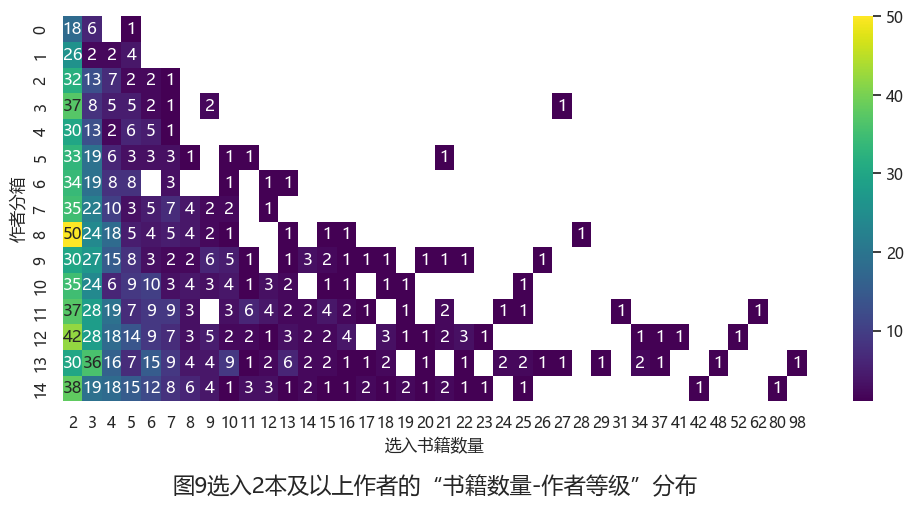

In [51]:
plt.figure(figsize=[12, 5])  # 设置图像大小

plt.title('图9选入2本及以上作者的“书籍数量-作者等级”分布', y=-.26, fontsize=16)
crosstab2 = pd.crosstab(ad.level, ad.book_count)
crosstab2 = crosstab2.drop(columns=[1])
crosstab2 = crosstab2.replace({0: np.nan})

g9 = sns.heatmap(crosstab2, cmap='viridis', annot=True)
g9.set(xlabel='选入书籍数量', ylabel='作者分箱')
plt.show()

**结论：** 如图9选入2本及以上作者的“书籍数量-作者等级”分布图所示，浅色多集中在左下部，说明选入书籍数量较多者确实成就较高。这也进一步佐证了有大成就的作者都是写作数量大且有不少好作品的人。

### （六）作者获得的成就与水平发挥的稳定性的关系
> 注：以作者各书籍评分的标准差为其水平发挥的稳定性。

**猜想：** 成就越大的作者水平发挥越稳定。

**设计：** 绘制各分箱中作者各书籍评分的标准差的散点图和箱线图。

**验证：**

In [19]:
if 'book_rating_std' not in ad.columns:
    ad = ad.merge(df[['authors','average_rating']].groupby('authors').apply('std').rename(columns={'average_rating': 'book_rating_std'}),
         how='inner', left_index=True, right_index=True)

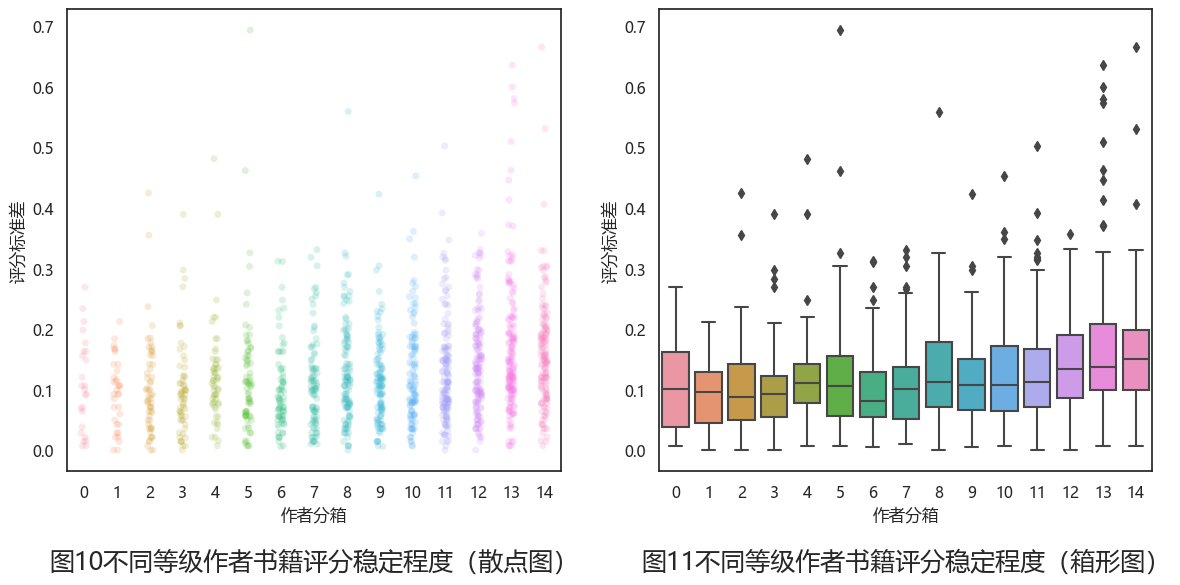

In [56]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.title('图10不同等级作者书籍评分稳定程度（散点图）', y=-.23, fontsize=18)
g10 = sns.stripplot(x='level', y='book_rating_std', jitter=1, data=ad, alpha=0.2).set(xlabel='作者分箱', ylabel='评分标准差')

plt.subplot(1 ,2, 2)
plt.title('图11不同等级作者书籍评分稳定程度（箱形图）', y=-.23, fontsize=18)
g10 = sns.boxplot(x='level', y='book_rating_std', data=ad).set(xlabel='作者分箱', ylabel='评分标准差')

plt.show()

**结论：** 如图10不同等级作者书籍评分稳定程度（散点图）和图11不同等级作者书籍评分稳定程度（箱形图）所示，评分标准差总体较小，但右侧的作者水平发挥略不稳定于左侧。说明欲要成为成就较大的作者，不一定需要非常稳定的水准。

## 五、研究结论
读者更倾向于挑选优秀的作家的书籍进行阅读，但对书籍进行评分时则都褒贬不一，几乎不受作者名气的影响，能够客观反映读者真实的内在想法。
好的作者要在大量的写作和试错中成长，在追求自己的个性、表达自己的想法、踊跃创新的同时，也要牢记大众是自己的写作对象，因此要写出能对广大群众有吸引力、有意义的作品。最终，也一定要出一二册精品佳作，方能取得较大的成就，受到专家和读者们的认可。

## 六、总结与展望

本课题主要通过“一万本好书的评分数据集”，先确定优秀作者和书籍的评价标准并验证其准确性，然后研究了“读者是否受到了对作者的从众心理的影响”、“书籍评分与阅读量逻辑链”、“作者获得的成就与选入书籍的数量的关系”以及“作者获得的成就与水平发挥的稳定性的关系”，使用数据可视化的方法从多个角度剖析数据，从作者角度得出了获取较大成就所需要具备的一些条件。

本文的研究对象集中在作者身上，而数据集的收录限制在“一万本好书”之内，即使本文已经尝试验证对作者评价的准确性，但还是可能缺乏对作者本身总体性的认识，导致结果的偏差。希望能够进一步获取更多数据，修正研究的结果。